In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def load_images(image_files):
    with open(image_files, 'rb') as f:
        magic = int.from_bytes(f.read(4), byteorder='big')
        if magic != 2051:
            raise ValueError("Invalid magic number, expected 2051")
        
        num_images = int.from_bytes(f.read(4), byteorder='big')

        rows = int.from_bytes(f.read(4), byteorder='big')
        cols = int.from_bytes(f.read(4), byteorder='big')

        images = np.frombuffer(f.read(), dtype= np.uint8)

        images = images.reshape(num_images, rows, cols)

        return images



In [10]:
def load_labels(label_files):
    with open(label_files, 'rb') as f:
        magic = int.from_bytes(f.read(4), byteorder='big')
        if magic != 2049:
            raise ValueError("Invalid Magic Number, expected 2051")
        
        num_labels = int.from_bytes(f.read(4), byteorder='big')

        labels = np.frombuffer(f.read(), dtype= np.uint8)

        return labels

In [6]:
train_image = load_images('train-images.idx3-ubyte')

In [7]:
train_image.shape

(60000, 28, 28)

In [11]:
train_label = load_labels('train-labels.idx1-ubyte')

In [12]:
train_label.shape

(60000,)

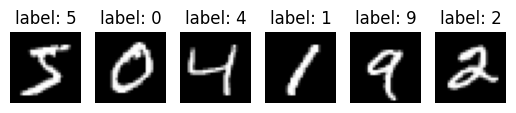

In [19]:
display = 6

for i in range(display):
    plt.subplot(1, display, i + 1)
    plt.imshow(train_image[i], cmap = 'gray')
    plt.title(f"label: {train_label[i]}")
    plt.axis('off')

plt.show()

In [41]:
from tensorflow.keras.layers import Dense

In [42]:
from tensorflow.keras.models import Sequential

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
import tensorflow as tf

In [90]:
from tensorflow.keras.models import load_model

In [73]:
train_images_flat = train_image.reshape(train_image.shape[0], -1)

In [74]:
train_images_flat.shape

(60000, 784)

In [75]:
train_labels = tf.keras.utils.to_categorical(train_label, num_classes=10)

In [76]:
early_stopping_monitor = EarlyStopping(patience = 2)

In [77]:
model = Sequential()

In [86]:
model.add(Dense(75, activation = 'tanh', input_shape = (784,)))


In [79]:
model.add(Dense(10, activation='softmax'))

In [80]:
model.compile(optimizer= 'adam', loss = "categorical_crossentropy", metrics=['accuracy'])

In [81]:
train_labels.shape

(60000, 10)

In [82]:
train_images_flat.shape

(60000, 784)

In [87]:
model.fit(train_images_flat, train_labels, validation_split= 0.3, epochs= 15, callbacks=[early_stopping_monitor])

Epoch 1/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9733 - loss: 0.0949 - val_accuracy: 0.9498 - val_loss: 0.2017
Epoch 2/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9737 - loss: 0.0887 - val_accuracy: 0.9568 - val_loss: 0.1805
Epoch 3/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9755 - loss: 0.0859 - val_accuracy: 0.9571 - val_loss: 0.2001
Epoch 4/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9752 - loss: 0.0917 - val_accuracy: 0.9513 - val_loss: 0.2070


In [92]:
model.save('my_model.keras')

In [93]:
my_model = load_model('my_model.keras')

c:\Users\Shivam Pal\Downloads\MNIST Classification\image_classification\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 14 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [123]:
test_images = load_images('t10k-images.idx3-ubyte')

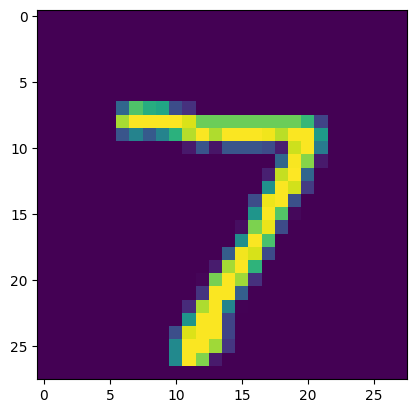

In [124]:
plt.imshow(test_images[0])
plt.show()

In [125]:
single_image_flat = test_images[0]

In [126]:
single_image = np.expand_dims(single_image_flat, axis=0)

In [127]:
prediction = my_model.predict(single_image)

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=uint8)
  • training=False
  • mask=None

In [113]:
print("Predicted probabilities:", prediction)

Predicted probabilities: [[ 0.29513487  0.24153648  0.00523054 -0.00633714  0.01029477  0.1397649
   0.15422012 -0.12567458  0.1160392   0.02742187  0.03940822 -0.08296666
  -0.13216981 -0.20371595  0.0643409   0.04312588 -0.02390441  0.06579365
   0.2882723   0.03599145 -0.16843721  0.04979241  0.00415646  0.00745429
  -0.05050413  0.06905179 -0.01769394  0.17570788  0.06573035  0.09354202
   0.23262411 -0.3254275   0.09614936 -0.01785561  0.15100743  0.12380857
  -0.12835416 -0.02244322 -0.0557193   0.05445787 -0.06535122 -0.07575444
  -0.06052009 -0.08407281 -0.13304338 -0.18016559  0.20028946  0.10537353
   0.2318709   0.01778933 -0.01452785  0.13978     0.1669459  -0.03672182
  -0.03283402 -0.10148798  0.10585594  0.02369429 -0.10789853 -0.10457931
  -0.05961255  0.08167516  0.10243896  0.04786915 -0.04289315  0.1929039
   0.03968026  0.15485503 -0.05263182  0.12402783 -0.03362462 -0.01634147
   0.08466638  0.10260274 -0.00840393]]


In [115]:
predicted_class = np.argmax(prediction)
print("Predicted class label:", predicted_class)

Predicted class label: 0


In [106]:
my_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 75)             │           825 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 75)             │         5,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97,672 (381.54 KB)

 Trainable params: 48,835 (190.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 48,837 (190.77 KB)